In [8]:
import pandas as pd
import numpy as np
import requests

# contest.list

Returns information about all available contests.

### Parameter	Description
gym	Boolean. If true — than gym contests are returned. Otherwide, regular contests are returned.
Return value: Returns a list of Contest objects. If this method is called not anonymously, then all available contests for a calling user will be returned too, including mashups and private gyms.

In [41]:
contest_list=requests.get("https://codeforces.com/api/contest.list?").json()
contest_list=pd.DataFrame(contest_list['result'])
contest_list

,id,name,type,phase,frozen,durationSeconds,startTimeSeconds,relativeTimeSeconds
0,1827,Codeforces Round (Div. 1),CF,BEFORE,False,7200,1684074900,-943738
1,1828,Codeforces Round (Div. 2),CF,BEFORE,False,7200,1684074900,-943738
2,1832,Educational Codeforces Round 148 (Rated for Di...,ICPC,BEFORE,False,7200,1683902100,-770938
3,1824,Codeforces Round (Div. 1),CF,BEFORE,False,7200,1683547500,-416338
4,1825,Codeforces Round (Div. 2),CF,BEFORE,False,7200,1683547500,-416338
...,...,...,...,...,...,...,...,...
1734,5,Codeforces Beta Round 5,ICPC,FINISHED,False,7200,1269100800,414030363
1735,4,Codeforces Beta Round 4 (Div. 2 Only),ICPC,FINISHED,False,7200,1268395200,414735963
1736,3,Codeforces Beta Round 3,ICPC,FINISHED,False,7200,1267963200,415167963
1737,2,Codeforces Beta Round 2,ICPC,FINISHED,False,7200,1267117200,416013963


# contest.ratingChanges
Returns rating changes after the contest.

## Parameter	Description
contestId (Required)	Id of the contest. It is not the round number. It can be seen in contest URL.   
For example: /contest/566/status
Return value: Returns a list of RatingChange objects.  

Example: https://codeforces.com/api/contest.ratingChanges?contestId=566

Note: 760*1737 *1141= 1.5 GB

In [40]:
ratingChanges=requests.get("https://codeforces.com/api/contest.ratingChanges?contestId=566").json()
ratingChanges=pd.DataFrame(ratingChanges['result'])
ratingChanges

,contestId,contestName,handle,rank,ratingUpdateTimeSeconds,oldRating,newRating
0,566,"VK Cup 2015 - Finals, online mirror",rng_58,1,1438284000,2849,2941
1,566,"VK Cup 2015 - Finals, online mirror",ngfam_kongu,2,1438284000,2294,2383
2,566,"VK Cup 2015 - Finals, online mirror",I_love_Hoang_Yen,2,1438284000,2498,2587
3,566,"VK Cup 2015 - Finals, online mirror",KFDong,3,1438284000,2138,2224
4,566,"VK Cup 2015 - Finals, online mirror",zld3794955,3,1438284000,2409,2495
...,...,...,...,...,...,...,...
756,566,"VK Cup 2015 - Finals, online mirror",coder222,619,1438284000,1335,1288
757,566,"VK Cup 2015 - Finals, online mirror",Mohtasim,622,1438284000,1534,1472
758,566,"VK Cup 2015 - Finals, online mirror",filename,623,1438284000,1324,1277
759,566,"VK Cup 2015 - Finals, online mirror",colin_ni,624,1438284000,1553,1490


## contest.standings

Returns the description of the contest and the requested part of the standings.

Parameter	Description  
contestId (Required)	Id of the contest. It is not the round number. It can be seen in contest URL. For example: /contest/566/status  
from	1-based index of the standings row to start the ranklist.  
count	Number of standing rows to return.  
handles	Semicolon-separated list of handles. No more than 10000 handles is accepted.  
room	If specified, than only participants from this room will be shown in the result. If not — all the participants will be shown.  
showUnofficial	If true than all participants (virtual, out of competition) are shown. Otherwise, only official contestants are shown.  
Return value: Returns object with three fields: "contest", "problems" and "rows".   
Field "contest" contains a Contest object.   
Field "problems" contains a list of Problem objects. Field "rows" contains a list of RanklistRow objects.

In [36]:
standings=requests.get("https://codeforces.com/api/contest.standings?contestId=566&showUnofficial=true").json()
standings_problems=pd.DataFrame(standings['result']['problems'])
standings_problems

,contestId,index,name,type,points,rating,tags
0,566,A,Matching Names,PROGRAMMING,1750.0,2300,"[dfs and similar, strings, trees]"
1,566,B,Replicating Processes,PROGRAMMING,2500.0,2600,"[constructive algorithms, greedy]"
2,566,C,Logistical Questions,PROGRAMMING,3000.0,3000,"[dfs and similar, divide and conquer, trees]"
3,566,D,Restructuring Company,PROGRAMMING,1000.0,1900,"[data structures, dsu]"
4,566,E,Restoring Map,PROGRAMMING,3000.0,3200,"[bitmasks, constructive algorithms, trees]"
5,566,F,Clique in the Divisibility Graph,PROGRAMMING,500.0,1500,"[dp, math, number theory]"
6,566,G,Max and Min,PROGRAMMING,2500.0,2500,[geometry]


In [37]:
standings_rows=pd.DataFrame(standings['result']['rows'])
standings_rows

,party,rank,points,penalty,successfulHackCount,unsuccessfulHackCount,problemResults
0,"{'contestId': 566, 'members': [{'handle': 'mar...",1,8238.0,0,0,0,"[{'points': 1582.0, 'rejectedAttemptCount': 0,..."
1,"{'contestId': 566, 'members': [{'handle': 'rng...",2,7974.0,0,1,0,"[{'points': 1330.0, 'rejectedAttemptCount': 0,..."
2,"{'contestId': 566, 'members': [{'handle': 'hog...",3,7048.0,0,0,0,"[{'points': 1162.0, 'rejectedAttemptCount': 0,..."
3,"{'contestId': 566, 'members': [{'handle': 'ngf...",4,6011.0,0,3,1,"[{'points': 1267.0, 'rejectedAttemptCount': 0,..."
4,"{'contestId': 566, 'members': [{'handle': 'ste...",5,5872.0,0,0,0,"[{'points': 1568.0, 'rejectedAttemptCount': 0,..."
...,...,...,...,...,...,...,...
6055,"{'contestId': 566, 'members': [{'handle': 'yin...",0,0.0,0,0,0,"[{'points': 0.0, 'rejectedAttemptCount': 0, 't..."
6056,"{'contestId': 566, 'members': [{'handle': 'WII...",0,0.0,0,0,0,"[{'points': 0.0, 'rejectedAttemptCount': 0, 't..."
6057,"{'contestId': 566, 'members': [{'handle': 'dmi...",0,0.0,0,0,0,"[{'points': 0.0, 'rejectedAttemptCount': 0, 't..."
6058,"{'contestId': 566, 'members': [{'handle': 'ser...",0,0.0,0,0,0,"[{'points': 0.0, 'rejectedAttemptCount': 0, 't..."


In [38]:
standings_party=pd.DataFrame(standings['result']['rows'][0]['party'])
standings_party

,contestId,members,participantType,ghost,startTimeSeconds
0,566,{'handle': 'maroonrk'},VIRTUAL,False,1621605600


The points to each problem

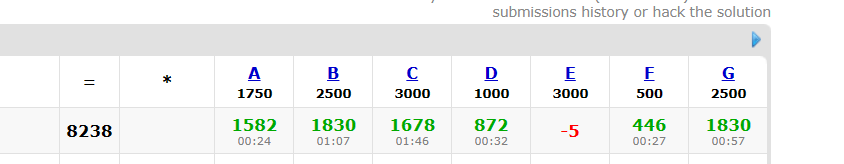

In [39]:
standings=requests.get("https://codeforces.com/api/contest.standings?contestId=566&showUnofficial=true").json()
standings_problems_results=pd.DataFrame(standings['result']['rows'][0]['problemResults'])
standings_problems_results

,points,rejectedAttemptCount,type,bestSubmissionTimeSeconds
0,1582.0,0,FINAL,1476.0
1,1830.0,0,FINAL,4078.0
2,1678.0,1,FINAL,6412.0
3,872.0,0,FINAL,1953.0
4,0.0,5,FINAL,NaN
5,446.0,0,FINAL,1665.0
6,1830.0,2,FINAL,3445.0
